Breast Cancer Prediction using Random Forest Classifier

This notebook presents a machine learning pipeline for predicting breast cancer using the Breast Cancer Wisconsin dataset available in scikit-learn. It uses a Random Forest Classifier to distinguish between malignant and benign tumors based on various cell features. The pipeline includes data preprocessing with standardization, model training, and performance evaluation using accuracy, confusion matrix, and classification report. This notebook is ideal for learning how to apply ensemble models to binary classification problems.

🎯 Accuracy: 0.9649122807017544

🧾 Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



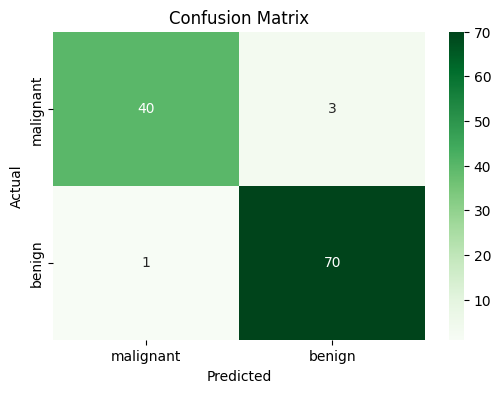

In [6]:

!pip install -U scikit-learn


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_test_scaled)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Greens", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
